<h1>Muli Linear Regression with Merged Dataset</h1>

In [1]:
import pandas as pd
import numpy as np

In [7]:
#Now we import the new dataset merged before to check records and null values if any
df_new = pd.read_csv('Dataset/Development_IT.csv')
df_new

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.56326,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.0,8640.0
1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.64777,4.65291,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.0,8640.0
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.55210,4.54932,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.0,8640.0
3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.57687,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.0,8640.0
4,533682,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,True,497195,4.56571,4.57203,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32746,1516977,Fundamental Service Oriented Arch (SOA) Securi...,/course/fundamental-service-oriented-arch-soa-...,True,16,3.25000,2.65702,2,0,2,2018-01-19T09:03:46Z,2018-01-28T09:20:37Z,455.0,1280.0
32747,1479824,Linux Certification for Experts - Practice Tes...,/course/linux-certification-for-beginners-prac...,True,15,4.00000,3.56818,2,0,2,2017-12-23T12:44:39Z,2017-12-24T07:38:36Z,455.0,1280.0
32748,1879598,SAP SuccessFactors Employee Central Payroll Fu...,/course/public-transport-management-systems/,True,19,2.75000,2.70354,2,5,0,2018-08-27T14:43:42Z,2018-09-19T23:19:18Z,1280.0,1280.0
32749,1940616,Comptia Linux+ / LPIC-1 (102-400),/course/comptia-linux-lpic-1-102-400/,True,1082,3.75000,3.72059,2,31,0,2018-09-30T15:11:27Z,2018-12-11T16:22:32Z,455.0,1280.0


In [3]:
#Check for null values if any
df_new.isnull().values.any()

False

In [4]:
#Check for duplicates if any
l=[]
for i,j in enumerate(df_new['id'].value_counts()):
    if j==2:
        l.append(df_new['id'].value_counts().index[i])
print(l)#Implies duplicates are removed

[]


<h1>Model Building</h1>

<h2> Multi Linear Repreesion</h2>

In [5]:
#Columns of the merged dataset
df = df_new
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'rating', 'num_reviews', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'price_detail__amount'],
      dtype='object')

<h3> Getting Sample of Data </h3>

In [6]:
#Random sample taken to do the analysis.
df_sample = df.sample(frac=0.10, axis=0)
df_sample

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
22389,2811181,Guía práctica del Análisis Financiero,/course/guia-practica-del-analisis-financiero/,True,29,4.35000,4.37588,10,16,0,2020-02-13T00:27:59Z,2020-03-21T17:54:34Z,455.0,1280.0
1549,2265670,Database Management Systems - MySQL,/course/database-management-systems-mysql/,True,14099,4.36364,4.12036,418,6,0,2019-03-11T08:44:37Z,2019-03-14T22:43:00Z,455.0,8640.0
26749,1161676,How To Get Your First Programming Job No Degre...,/course/how-to-get-first-programming-job-no-de...,True,9245,4.50000,4.57380,63,26,0,2017-03-28T22:14:14Z,2018-01-03T03:40:21Z,455.0,2240.0
25320,2580574,Intro to Shopify Theme and Store Development w...,/course/master-shopify/,True,763,3.80392,3.81859,179,18,0,2019-09-27T21:54:17Z,2019-11-16T14:23:58Z,455.0,1280.0
31042,2123100,Navigating the Complexities of Software Licens...,/course/navigating-the-complexities-of-softwar...,True,13,5.00000,5.00000,7,19,0,2019-01-03T00:36:34Z,2020-08-14T19:50:15Z,455.0,2240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767,3226201,AWS Certified Security - Specialty Exam 2020,/course/aws-certified-security-specialty-exam-...,True,3583,3.31250,3.68300,8,0,5,2020-06-11T13:31:57Z,2020-06-11T13:51:34Z,455.0,2880.0
9659,2624956,Java For Kids - A Fun 30 Minutes Course,/course/complete-java-course-beginner-to-advan...,True,3464,2.40000,2.34637,45,5,0,2019-10-25T17:17:43Z,2019-10-26T13:47:59Z,455.0,8320.0
14947,1655796,12 Technical & Business Writing Power Techniqu...,/course/12-writing-techniques/,True,2233,4.00000,3.97605,28,16,0,2018-04-20T18:39:45Z,2018-04-28T16:28:57Z,3200.0,3200.0
5329,961508,Learn Spring Security 4 Basics - Hands On,/course/learn-spring-security-4-basics-hands-on/,True,356,3.25000,3.23178,51,16,0,2016-09-18T14:07:35Z,2016-09-19T14:44:43Z,455.0,6080.0


<h3>Preprocessing of Sample</h3>

In [7]:
df_sample.isnull().values.any()#No null values present

False

In [8]:
#Duplicates have been removed
#Redundant columns are also removed

In [9]:
#Determine which columns to use for the model.
#4 columns: Y:price_detail__amount X:num_subscribers, num_published_lectures

In [10]:
#Preprocessing the sample to remove those courses which are freeas we are prediciting final amount
df_sample.drop(df_sample[df_sample['is_paid']==False].index, inplace=True)

In [11]:
#Preprocessing: Finding multicollinearity initially to check if the explanatory variables are collinear or not
#Initially we find collinearity between num_subscribers and num_reviews.
cor = df_sample['num_subscribers'].corr(df_sample['num_published_lectures'])
print(cor)#these two are not much correlated

0.16374208887771305


In [12]:
df_sample

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
22389,2811181,Guía práctica del Análisis Financiero,/course/guia-practica-del-analisis-financiero/,True,29,4.35000,4.37588,10,16,0,2020-02-13T00:27:59Z,2020-03-21T17:54:34Z,455.0,1280.0
1549,2265670,Database Management Systems - MySQL,/course/database-management-systems-mysql/,True,14099,4.36364,4.12036,418,6,0,2019-03-11T08:44:37Z,2019-03-14T22:43:00Z,455.0,8640.0
26749,1161676,How To Get Your First Programming Job No Degre...,/course/how-to-get-first-programming-job-no-de...,True,9245,4.50000,4.57380,63,26,0,2017-03-28T22:14:14Z,2018-01-03T03:40:21Z,455.0,2240.0
25320,2580574,Intro to Shopify Theme and Store Development w...,/course/master-shopify/,True,763,3.80392,3.81859,179,18,0,2019-09-27T21:54:17Z,2019-11-16T14:23:58Z,455.0,1280.0
31042,2123100,Navigating the Complexities of Software Licens...,/course/navigating-the-complexities-of-softwar...,True,13,5.00000,5.00000,7,19,0,2019-01-03T00:36:34Z,2020-08-14T19:50:15Z,455.0,2240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767,3226201,AWS Certified Security - Specialty Exam 2020,/course/aws-certified-security-specialty-exam-...,True,3583,3.31250,3.68300,8,0,5,2020-06-11T13:31:57Z,2020-06-11T13:51:34Z,455.0,2880.0
9659,2624956,Java For Kids - A Fun 30 Minutes Course,/course/complete-java-course-beginner-to-advan...,True,3464,2.40000,2.34637,45,5,0,2019-10-25T17:17:43Z,2019-10-26T13:47:59Z,455.0,8320.0
14947,1655796,12 Technical & Business Writing Power Techniqu...,/course/12-writing-techniques/,True,2233,4.00000,3.97605,28,16,0,2018-04-20T18:39:45Z,2018-04-28T16:28:57Z,3200.0,3200.0
5329,961508,Learn Spring Security 4 Basics - Hands On,/course/learn-spring-security-4-basics-hands-on/,True,356,3.25000,3.23178,51,16,0,2016-09-18T14:07:35Z,2016-09-19T14:44:43Z,455.0,6080.0


<h3>Descriptive Analysis pertaining to model</h3>

In [13]:
#import packages
import seaborn as sns

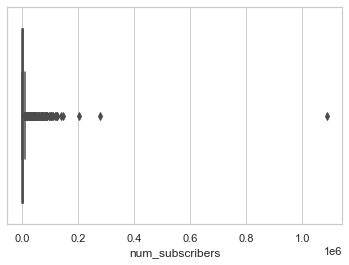

In [14]:
#Box plot for each column considered to anlayse summary statistic and outliers.
#1. num_subscribers:
sns.set(style='whitegrid')
box_plot = sns.boxplot(x=df_sample['num_subscribers'])

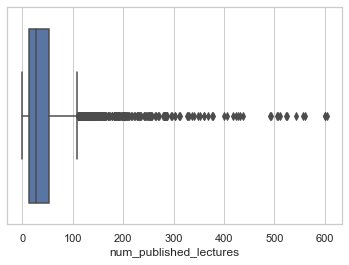

In [15]:
#2. num_published_lectures
sns.set(style='whitegrid')
box_plot = sns.boxplot(x=df_sample['num_published_lectures'])

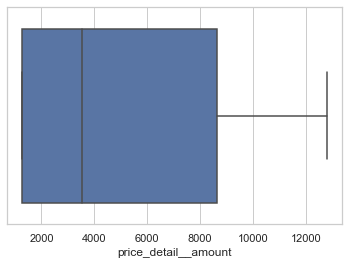

In [16]:
#3. price_detail__amount 
sns.set(style='whitegrid')
box_plot = sns.boxplot(x=df_sample['price_detail__amount'])

In [17]:
#Both the explanatory variables has outliers but let us check how does it work out in model
#Let's take scatter plots to analyse their distribution and identify the functional form

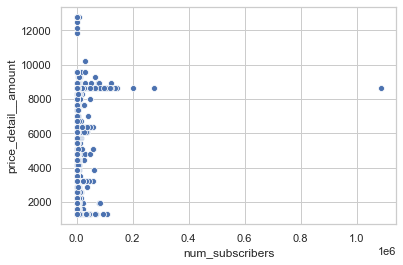

In [18]:
#1. Scatter Plot Between num_subscriber's and price_detail__amount
sns.scatterplot(data=df_sample, x='num_subscribers', y='price_detail__amount')

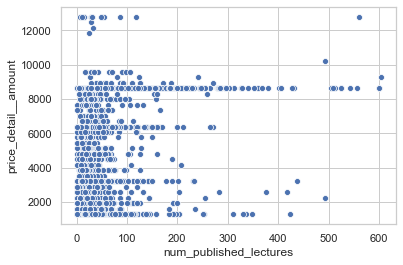

In [19]:
sns.scatterplot(data=df_sample, x='num_published_lectures', y='price_detail__amount')

<h3>Training and Testing Data</h3>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Determining the dependent and independent variables for multi linear regression.
model_df = df_sample[['num_subscribers','num_published_lectures']]
target = df_sample['price_detail__amount']
print(model_df, target)

       num_subscribers  num_published_lectures
22389               29                      16
1549             14099                       6
26749             9245                      26
25320              763                      18
31042               13                      19
...                ...                     ...
30767             3583                       0
9659              3464                       5
14947             2233                      16
5329               356                      16
16996               49                      10

[3228 rows x 2 columns] 22389    1280.0
1549     8640.0
26749    2240.0
25320    1280.0
31042    2240.0
          ...  
30767    2880.0
9659     8320.0
14947    3200.0
5329     6080.0
16996    3200.0
Name: price_detail__amount, Length: 3228, dtype: float64


In [22]:
#Test and train Split.
X_train, X_test, y_train, y_test = train_test_split(model_df, target, test_size=0.2)
print(X_train.shape, y_train.shape)#Training set
print(X_test.shape, y_test.shape)#Validation ot test set(here)

(2582, 2) (2582,)
(646, 2) (646,)


<h3>Functional Form</h3>

In [23]:
#Initially we start with the simplest functional form.
#price = beta(0)*subscribers + beta(1)*published_lectures + error

<h3>Estimate regression paarameters</h3>

In [24]:
#We perform multiple regression using sklearn
from sklearn import linear_model

In [25]:
#we first formulate the model and train on training data.
MLR_model = linear_model.LinearRegression()
MLR_model.fit(X_train, y_train)
print(MLR_model.coef_)
print(MLR_model.intercept_)

[7.51825906e-03 1.37655512e+01]
4072.3305654124906


In [26]:
#Now we try to test on test data
predictions = MLR_model.predict(X_test)
print(predictions.shape)
print(y_test.shape)

(646,)
(646,)


In [27]:
#Metrics:
print(MLR_model.score(X_test, y_test))

0.08046956720963261


<h3> Another method of doing regression </h3>

In [28]:
#import packages
import statsmodels.api as sm

In [29]:
#MLR model in Stats method.
MLR_model2 = sm.OLS(y_train, X_train).fit()
predictions = MLR_model2.predict(X_test)

In [30]:
#Summary of the model.
MLR_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     price_detail__amount   R-squared (uncentered):                   0.390
Model:                              OLS   Adj. R-squared (uncentered):              0.390
Method:                   Least Squares   F-statistic:                              825.2
Date:                  Sun, 29 Nov 2020   Prob (F-statistic):                   9.26e-278
Time:                          07:56:30   Log-Likelihood:                         -25343.
No. Observations:                  2582   AIC:                                  5.069e+04
Df Residuals:                      2580   BIC:                                  5.070e+04
Df Model:                             2                                                  
Covariance Type:              nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_subscribers            0.0149      0.003      4.260      0.000       0.008       0.022
num_published_lectures    46.3583      1.220     37.989      0.000      43.965      48.751
==============================================================================
Omnibus:                      543.505   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2292.592
Skew:                          -0.964   Prob(JB):                         0.00
Kurtosis:                       7.194   Cond. No.                         361.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""